In [ ]:
import os
import xarray as xr

# === Paths ===
rainfall_folder = r"Data - Modelling\Monthly_DB\Variables\Rainfall"
maxtemp_folder = r"Data - Modelling\Monthly_DB\Variables\Max Temp"
mintemp_folder = r"Data - Modelling\Monthly_DB\Variables\Min Temp"
radiation_folder = r"Data - Modelling\Monthly_DB\Variables\Radiation"
spi_folder = r"Data - Modelling\Monthly_DB\Variables\SPI"
output_file = r"Data - Modelling\Monthly_DB\Combined\Combined_Labeled_Qld.nc"

# === List all files (ensure all folders have the same years) ===
years = sorted([
    re.search(r"\d{4}", f).group()
    for f in os.listdir(rainfall_folder)
    if f.endswith(".nc") and re.search(r"\d{4}", f)
])

# === Initialize a list for combined datasets ===
datasets = []

# === Combine all variables year by year ===
for year in years:
    print(f"📂 Processing year: {year}")

    # === Load each variable ===
    ds_rain = xr.open_dataset(os.path.join(rainfall_folder, f"Monthly_QLD_{year}.monthly_rain.nc"))
    ds_maxtemp = xr.open_dataset(os.path.join(maxtemp_folder, f"Monthly_QLD_{year}.max_temp.nc"))
    ds_mintemp = xr.open_dataset(os.path.join(mintemp_folder, f"Monthly_QLD_{year}.min_temp.nc"))
    ds_radiation = xr.open_dataset(os.path.join(radiation_folder, f"Monthly_QLD_{year}.radiation.nc"))
    ds_spi = xr.open_dataset(os.path.join(spi_folder, f"SPI_Monthly_QLD_{year}.monthly_rain.nc"))

    # === Align all datasets by lat, lon, time ===
    ds_combined = xr.merge([
        ds_rain["monthly_rain"],
        ds_maxtemp["max_temp"],
        ds_mintemp["min_temp"],
        ds_radiation["radiation"],
        ds_spi["spi_1"]
    ])

    # === Preserve region_code ===
    if "region_code" in ds_rain:
        ds_combined["region_code"] = ds_rain["region_code"]

    # === Append to list ===
    datasets.append(ds_combined)

# === Concatenate all years into a single dataset ===
ds_combined = xr.concat(datasets, dim="time")
print(f"✅ Combined all years: {len(ds_combined.time)} months total.")

# === Save the combined dataset ===
ds_combined.to_netcdf(output_file)
print(f"✅ Saved combined dataset: {output_file}")


📂 Processing year: 2000
📂 Processing year: 2001
📂 Processing year: 2002
📂 Processing year: 2003
📂 Processing year: 2004
📂 Processing year: 2005
📂 Processing year: 2006
📂 Processing year: 2007
📂 Processing year: 2008
📂 Processing year: 2009
📂 Processing year: 2010
📂 Processing year: 2011
📂 Processing year: 2012
📂 Processing year: 2013
📂 Processing year: 2014
📂 Processing year: 2015
📂 Processing year: 2016
📂 Processing year: 2017
📂 Processing year: 2018
📂 Processing year: 2019
📂 Processing year: 2020
📂 Processing year: 2021
📂 Processing year: 2022
📂 Processing year: 2023
📂 Processing year: 2024
✅ Combined all years: 300 months total.
✅ Saved combined dataset: Data - Modelling\Monthly_DB\Combined\Combined_Labeled_Qld.nc


In [17]:
import xarray as xr

# === Load the combined file ===
combined_file = r"Data - Modelling\Monthly_DB\Combined\Combined_Labeled_Qld.nc"
ds_combined = xr.open_dataset(combined_file)

# === Display file summary ===
print("\n✅ Combined Dataset Summary:")
print(ds_combined)

# === Display available variables ===
print("\n✅ Available Variables:")
print(list(ds_combined.data_vars.keys()))

# === Display available coordinates ===
print("\n✅ Available Coordinates:")
print(list(ds_combined.coords.keys()))

# === Display time range ===
print("\n✅ Time Range:")
print(ds_combined.time.values[[0, -1]])

# === Display region codes (unique values) ===
if "region_code" in ds_combined:
    print("\n✅ Unique Region Codes:")
    print(ds_combined.region_code.values)

# === Display a quick preview (first 3 months of rainfall) ===
print("\n✅ Rainfall (First 3 Months):")
print(ds_combined["monthly_rain"].isel(time=slice(0, 3)))



✅ Combined Dataset Summary:
<xarray.Dataset> Size: 1GB
Dimensions:       (time: 300, lat: 382, lon: 311)
Coordinates:
  * lat           (lat) float64 3kB -29.15 -29.1 -29.05 ... -10.2 -10.15 -10.1
  * lon           (lon) float64 2kB 138.0 138.1 138.1 ... 153.4 153.4 153.5
  * time          (time) datetime64[ns] 2kB 2000-01-01 2000-02-01 ... 2024-12-01
Data variables:
    monthly_rain  (time, lat, lon) float64 285MB ...
    max_temp      (time, lat, lon) float64 285MB ...
    min_temp      (time, lat, lon) float64 285MB ...
    radiation     (time, lat, lon) float64 285MB ...
    spi_1         (time, lat, lon) float64 285MB ...
    region_code   (time, lat, lon) int16 71MB ...
Attributes:
    long_name:     Monthly rainfall
    units:         mm
    valid_min:     -32765
    valid_max:     32767
    grid_mapping:  spatial_ref

✅ Available Variables:
['monthly_rain', 'max_temp', 'min_temp', 'radiation', 'spi_1', 'region_code']

✅ Available Coordinates:
['lat', 'lon', 'time']

✅ Time Ran

In [18]:
# Print the minimum and maximum values of monthly_rain
min_rain = ds_combined["monthly_rain"].min().item()
max_rain = ds_combined["monthly_rain"].max().item()

print(f"Minimum Monthly Rain: {min_rain}")
print(f"Maximum Monthly Rain: {max_rain}")

Minimum Monthly Rain: 0.0
Maximum Monthly Rain: 2789.4



✅ Available Variables: ['monthly_rain', 'max_temp', 'min_temp', 'radiation', 'spi_1', 'region_code']


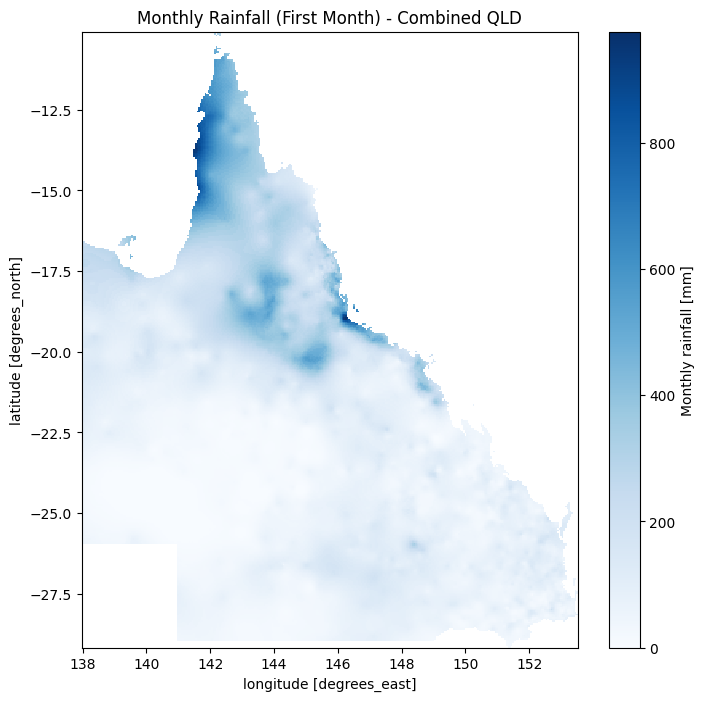

In [25]:
import xarray as xr
import matplotlib.pyplot as plt

# === Load the combined dataset ===
combined_file = r"Data - Modelling\Monthly_DB\Combined\Combined_Labeled_Qld.nc"  # Adjust the path if needed
ds_combined = xr.open_dataset(combined_file)

# === Check the available variables in the combined file ===
print("\n✅ Available Variables:", list(ds_combined.data_vars.keys()))

# === Selecting one of the variables (rainfall) ===
rainfall = ds_combined["monthly_rain"]

# === Plotting a heatmap for the first month ===
plt.figure(figsize=(8, 8))
rainfall.isel(time=25).plot(cmap="Blues")  # First month
plt.title("Monthly Rainfall (First Month) - Combined QLD")
plt.show()
